# Домашнее задание 1

**Выполнил:** Бабаев Минходжхон Зафарович

**На сколько выполнил:** 7-8

**Правила игры:**

* возле каждой задачи указано число баллов (в сококупности можно получить 10 баллов)

* дополнительные задачи выделены звездочкой (также указано число баллов). Данные баллы можно будет использовать для улучшения результата за любое домашнее задание

* все подсчеты необходимо делать с помощью pandas-numpy (использовать как можно меньше циклов, за использование циклов, где это не требуются, будем штрафовать)

* для визуализации можно использовать matplotlib-seaborn-plotly (учтите, что все графики должны выглядеть опрятно, иметь название-подписи, за нечитабельные графики будем штрафовать)

* возможно, что в данных есть пустоты и невалидные значения. Перед началом любой работы необходимо исследовать, и если такие есть, убрать их

* соблюдайте чистоту кода: переменные должны быть осмысленными, не повторяйтесь, если в этом нет необходимости (иначе используйте функции). Чем чище код - тем проще нам поставить вам хорошую оценку :)

* общая рекомендация: на вопросы со звездочкой отвечать в самом конце, возможно, будет проще)

## Данные 

В этом домашнем задании вам придется оказаться на месте аналитика в бразильском маркетплейсе [Olist](https://olist.com/pt-br/). Вам необходимо исследовать данные и на их основании сделать выводы, которые помогут бизнесу расцветать!

Данные находятся тут: (будет ссылка)

Ван дано 9 датасетов, которые содержат в себе все данные по 100 000 заказам со всей Бразилии. Чтобы облегчить вам жизнь, вот связи по этим датасетам (файл product_category_name_translation является переводом названий категорий с бразильского на английский)

![](https://i.imgur.com/HRhd2Y0.png)

Ну что же, начнем, пожалуй!

In [259]:
pip install googletrans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [260]:
import numpy as np
import pandas as pd
import seaborn as sns

import numpy.linalg as lin
import scipy.stats as st
import scipy.sparse as sp
import matplotlib.pyplot as plt
import dateutil as dt
from datetime import datetime
import tabulate
from googletrans import Translator
import plotly.graph_objects as go
import plotly.graph_objects as px

In [261]:
!wget https://github.com/Palladain/Deep_Python/raw/main/Homeworks/Homework_1/archive.zip

--2022-10-16 17:25:19--  https://github.com/Palladain/Deep_Python/raw/main/Homeworks/Homework_1/archive.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Palladain/Deep_Python/main/Homeworks/Homework_1/archive.zip [following]
--2022-10-16 17:25:19--  https://raw.githubusercontent.com/Palladain/Deep_Python/main/Homeworks/Homework_1/archive.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44717580 (43M) [application/zip]
Saving to: ‘archive.zip.5’

archive.zip.5       100%[===================>]  42.65M   169MB/s    in 0.3s    

2022-10-16 17:25:20 (169 MB/s) - ‘archive.zip.5’ saved [44717580/

In [262]:
!unzip archive.zip

Archive:  archive.zip
replace olist_customers_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [263]:
customers = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
category_name_translation = pd.read_csv('product_category_name_translation.csv')
products = pd.merge(products, category_name_translation, on='product_category_name', how="inner")
products = products.drop(columns=['product_category_name'])
products = products.rename(columns={"product_category_name_english": "product_category_name"})

In [264]:
customers = customers.dropna()
geolocation = geolocation.dropna()
order_items = order_items.dropna()
order_payments = order_payments.dropna()
order_reviews = order_reviews.dropna(subset=['review_id', 'order_id'])
orders = orders.dropna(subset=["order_id"])
products = products.dropna()
sellers = sellers.dropna()


## Задание 1 (0.4 балла)

Определите:

* Число товаров
* Среднюю стоимость товара

в разрезе категорий (все категории должны быть на английском языке)

In [265]:
products.sample(10)

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
782,47a4d6ab2e9b253f8c3c8aefa0c40285,49.0,571.0,1.0,250.0,20.0,20.0,20.0,perfumery
11138,8275ff8af7dedbf142a446d74d0c5daf,55.0,98.0,1.0,150.0,20.0,13.0,15.0,home_appliances
11376,67638c5b9e1d3f0f3c76cd4147eeac2f,40.0,1156.0,1.0,310.0,17.0,14.0,12.0,toys
29343,6fd771d57c8870a7affe71227bea0d5c,44.0,876.0,4.0,575.0,20.0,11.0,17.0,small_appliances
1620,b8983274d38e4c05381bc3c80af2ad2e,52.0,1416.0,1.0,300.0,16.0,16.0,16.0,sports_leisure
4393,1ad110eaab5105bf841dc2b8985190e5,46.0,756.0,1.0,600.0,26.0,23.0,11.0,baby
12694,1c6b0760060e08631997f228e1d07a78,41.0,111.0,1.0,350.0,40.0,4.0,30.0,bed_bath_table
17539,e4ca96fc59c4c8b33c732c377b5c773f,57.0,2576.0,1.0,1233.0,21.0,22.0,16.0,health_beauty
3681,c1efc30d1b6b50c2bbf4644102bc16dc,57.0,951.0,2.0,200.0,20.0,12.0,15.0,sports_leisure
30929,82029e5d2411cd3a74021d94ee87d457,51.0,535.0,2.0,508.0,16.0,17.0,17.0,fixed_telephony


In [266]:
products_by_category = products.groupby(['product_category_name']).agg({"product_id": "nunique"}) # число товаров по каждой категории
products_by_category

,product_id
product_category_name,
agro_industry_and_commerce,74
air_conditioning,124
art,55
arts_and_craftmanship,19
audio,58
...,...
stationery,849
tablets_printing_image,9
telephony,1134


In [267]:
merged_products_with_order_items = pd.merge(products, order_items, on='product_id', how='inner') #делаем merge
mean_product_price = merged_products_with_order_items.groupby(['product_category_name']).agg({"price": "mean"})
mean_product_price

,price
product_category_name,
agro_industry_and_commerce,342.124858
air_conditioning,185.269226
art,115.802105
arts_and_craftmanship,75.583750
audio,139.254121
...,...
stationery,91.753369
tablets_printing_image,90.703735
telephony,71.213978


## Задание 2 (1,5 балла)

Определите для каждого продавца основную категорию их продаж.

Отобразите категории по числу продавцов, для которых данная категория основная, а также создайте график, по которому можно выбрать отдельно штат и посмотреть такое же распределение



In [268]:
merged_products_with_order_items_and_sellers = pd.merge(sellers, merged_products_with_order_items, on='seller_id', how='inner') #делаем merge
main_cat_for_seller = []
i = 0;
for seller_id in sellers["seller_id"].unique():
  b = merged_products_with_order_items_and_sellers[merged_products_with_order_items_and_sellers.seller_id == seller_id]
  if len(b["product_category_name"].value_counts().index.tolist()) > 0:
    prod_cat_name = b["product_category_name"].value_counts().index.tolist()[0]
    main_cat_for_seller.append([seller_id, prod_cat_name])
main_cat_for_seller = pd.DataFrame(main_cat_for_seller, columns = ['seller_id', 'product_category_name'])
main_cat_for_seller

,seller_id,product_category_name
0,3442f8959a84dea7ee197c632cb2df15,sports_leisure
1,d1b65fc7debc3361ea86b5f14c68d2e2,luggage_accessories
2,ce3ad9de960102d0677a81f5d0bb7b2d,baby
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sports_leisure
4,51a04a8a6bdcb23deccc82b0b80742cf,electronics
...,...,...
3028,f1fdf2d13186575751aa25876536d85c,sports_leisure
3029,98dddbc4601dd4443ca174359b237166,housewares
3030,f8201cab383e484733266d1906e2fdfa,cool_stuff
3031,74871d19219c7d518d0090283e03c137,sports_leisure


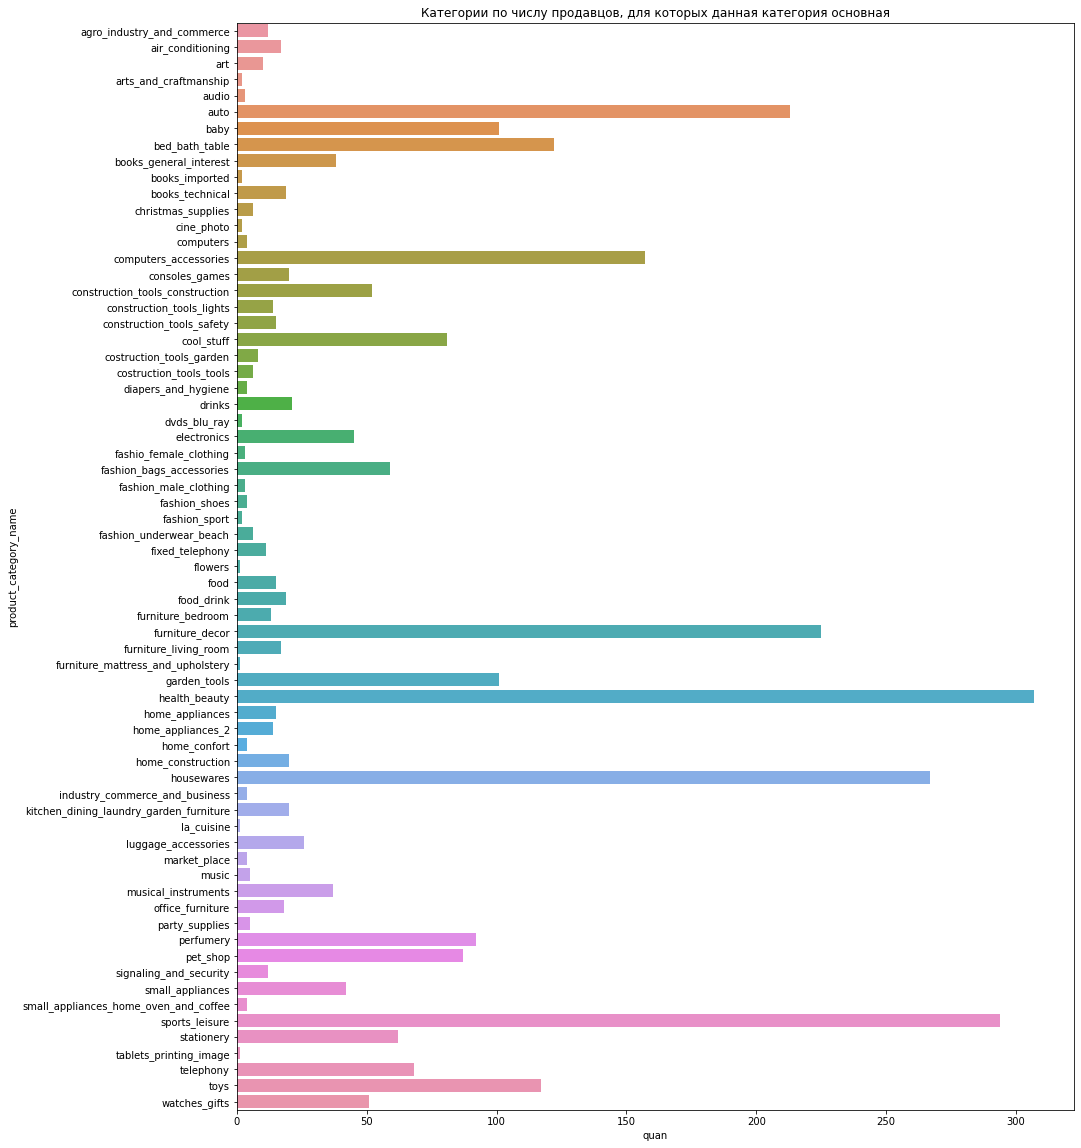

In [269]:
plt.figure(figsize=(15, 20))
sns.barplot(data=main_cat_for_seller.groupby("product_category_name") \
    .agg({"seller_id": "nunique"}) \
    .reset_index() \
    .rename(columns={"seller_id": "quan"}) \
    , x="quan", y="product_category_name")
plt.title("Категории по числу продавцов, для которых данная категория основная")
plt.show()

## Задание 3 (1,5 балл)

Покажите процент

* суммы покупок в деньгах

* суммы покупок в штуках

по категории для доставленных заказов, а также разбивку по штатам

In [270]:
merged_products_and_order_items_with_orders = pd.merge(merged_products_with_order_items, orders, how = "inner", on = "order_id")
merged_products_and_order_items_with_orders_only_delivered = merged_products_and_order_items_with_orders[merged_products_and_order_items_with_orders['order_status'] == 'delivered']
result = merged_products_and_order_items_with_orders_only_delivered.copy(deep=True)
result = result.groupby(['product_category_name']).agg({"price": "sum"}).reset_index()
result['price_in_percent'] = result['price'] / result['price'].sum() * 100
result

,product_category_name,price,price_in_percent
0,agro_industry_and_commerce,70566.10,0.541002
1,air_conditioning,53323.56,0.408810
2,art,23657.30,0.181371
3,arts_and_craftmanship,1814.01,0.013907
4,audio,50570.60,0.387704
...,...,...,...
66,stationery,223788.69,1.715698
67,tablets_printing_image,7528.41,0.057717
68,telephony,309860.23,2.375573
69,toys,471286.48,3.613163


In [271]:
data_for_each_product_category = merged_products_and_order_items_with_orders_only_delivered.product_category_name.value_counts().reset_index()
data_for_each_product_category = data_for_each_product_category.rename(columns = {"product_category_name": "quantity"})
data_for_each_product_category = data_for_each_product_category.rename(columns = {"index": "product_category_name"})
data_for_each_product_category

,product_category_name,quantity
0,bed_bath_table,10953
1,health_beauty,9465
2,sports_leisure,8431
3,furniture_decor,8160
4,computers_accessories,7644
...,...,...
66,arts_and_craftmanship,24
67,la_cuisine,14
68,cds_dvds_musicals,14
69,fashion_childrens_clothes,7


## Задание 4 (0.6 балла)

Визуализируйте зависимость между средним числом покупок и:

* числом фотографий товара

* кол-во символов в описании товара (аггрегируйте с шагом 20)

* кол-во символов в названии (аггрегируйте с шагом 5)

In [272]:
plot = px.Figure(data=[
    go.Bar(orientation='h',
          name = 'Среднее число покупок',
          x = [100],
    ),
    go.Bar(orientation='h',
          name = 'Число фотографий товара',
          x = [56],
   )
])
 
plot.update_layout()
                  
plot.show()



## Задание 5* (1 балл)

Имея полученные данные по товарам, чекам и категориям, а также сделав дополнительные расчеты (если необходимо), предположите:

1. Продавцов каких категорий необходимо привлекать в маркетплейс?

2. Какие категории в каких штатах необходимо развивать?

3. Развитие каких категорий не принесут большого эффекта и почему?

4. Какие рекомендации можно дать для продавцов, чтобы их товар лучше продавался?

## Задание 6 (0.5 балла)

Определите средний чек покупки (добавьте разбивку на стоимость самого заказ и стоимость доставки) и среднее число товаров в заказе

In [273]:
print("Средний чек покупки без стоимости доставки", order_items.price.sum() / order_items['order_id'].nunique())
unique_order_items = order_items.drop_duplicates(subset = ["order_id"])
print("Cредний чек доставки ", unique_order_items.freight_value.mean())
print("Cредний чек покупки с доставкой" ,  (unique_order_items["price"] + unique_order_items["freight_value"]).mean())
print("Cреднее число товаров в заказе ", len(order_items['product_id']) / len(unique_order_items))

Средний чек покупки без стоимости доставки 137.7540763788945
Cредний чек доставки  20.20192680355948
Cредний чек покупки с доставкой 146.16625402874342
Cреднее число товаров в заказе  1.1417306873695092


## Задание 7 (0.2 балла)

Определите среднее число покупок на пользователя (обратите внимание на идентификаторы)

In [274]:
len(orders) / customers['customer_unique_id'].nunique()

1.0348089410589412

## Задание 8 (0.2 балла)

Отобразите среднюю сумму оплаты по типу оплаты

In [275]:
mean_price_by_payment_type = order_payments.groupby(['payment_type']).agg({"payment_value": "mean"})
mean_price_by_payment_type

,payment_value
payment_type,
boleto,145.034435
credit_card,163.319021
debit_card,142.570170
not_defined,0.000000
voucher,65.703354


## Задание 9 (0.4 балла)

Обратите внимание на число платежей (payment_installments). Выясните, какая сумма оплаты указана: за целую покупку или только за ее часть?

Также покажите средний чек в зависимости от числа оплаты. Есть ли какая-то связь между ними?

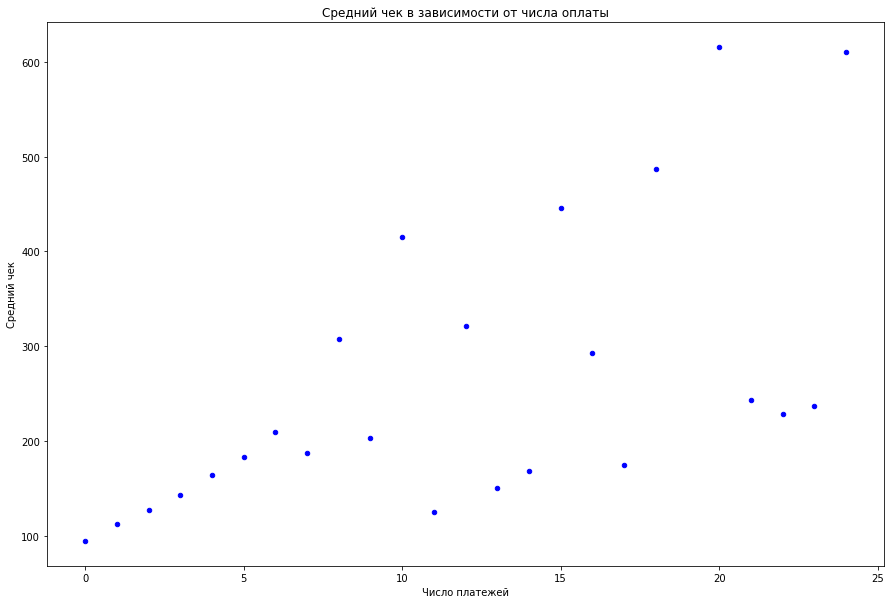

In [276]:
average_check_depending_on_the_number_of_purchases = order_payments.groupby(['payment_installments']).agg({"payment_value": "mean"}).reset_index()
df = pd.DataFrame(data = average_check_depending_on_the_number_of_purchases);
df.plot.scatter(x = 'payment_installments', y = 'payment_value', c = 'blue', figsize=(15, 10), xlabel="Число платежей", ylabel="Средний чек", title="Cредний чек в зависимости от числа оплаты");

**Заметим, что чем больше растянуть оплату по времени, тем больше прирост среднего чека.**

## Задание 10 (0.4 балла)

Визуализируйте зависимость между ценой заказа и ценой доставки по штатам покупки. Есть ли какая-нибудь зависимость и как вы можете ее обосновать?

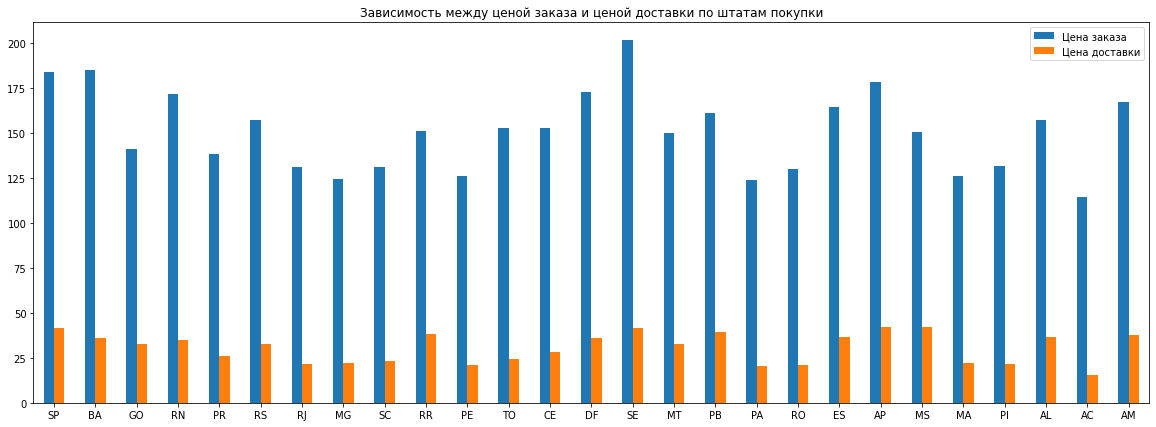

In [277]:
orders_customers_id = orders[["customer_id", "order_id"]]
merged_orders_customers_id_with_customers = orders_customers_id.merge(customers, on="customer_id", how="inner")
merged_orders_customers_id_and_customers_with_order_id = merged_orders_customers_id_with_customers.merge(order_items, how="inner", on="order_id")
merged_orders_customers_id_and_customers_with_order_id = merged_orders_customers_id_and_customers_with_order_id.drop_duplicates(subset="order_id")
merged_orders_customers_id_and_customers_with_order_id = merged_orders_customers_id_and_customers_with_order_id[["customer_state", "price", "freight_value"]]

prices_by_states = merged_orders_customers_id_and_customers_with_order_id.groupby(["customer_state"]).agg({"price" : "mean"}).reset_index()
freight_values_by_state = merged_orders_customers_id_and_customers_with_order_id.groupby(["customer_state"]).agg({"freight_value" : "mean"}).reset_index()

states = merged_orders_customers_id_and_customers_with_order_id['customer_state'].unique()
df = pd.DataFrame({'Цена заказа': prices_by_states["price"].tolist(),
                   'Цена доставки': freight_values_by_state['freight_value'].tolist()}, index=states)
ax = df.plot.bar(rot=0, figsize = (20, 7), title="Зависимость между ценой заказа и ценой доставки по штатам покупки")

## Задание 11 (0.4 балла)

Выведите график по числу покупок (в разбивке по статусам) и временем покупки (аггрегируйте покупки до дня)

[]

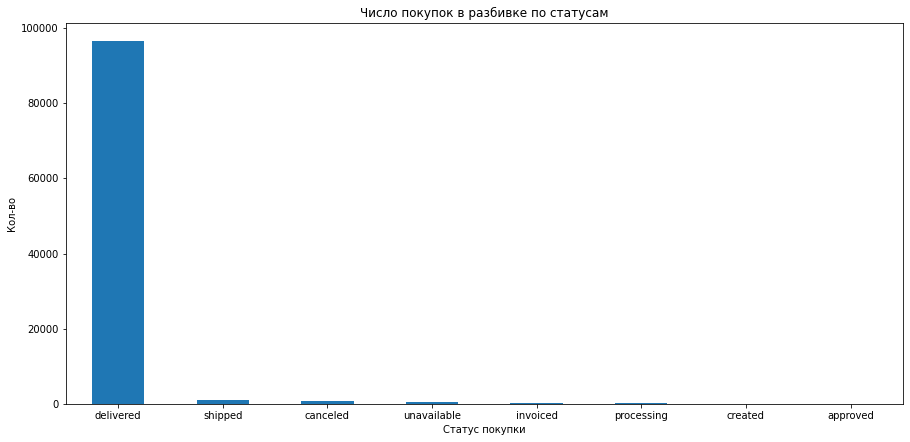

In [278]:
number_of_purchases_by_status = orders["order_status"].value_counts().reset_index()
df = pd.DataFrame(data=number_of_purchases_by_status)
ax = df.plot.bar(x='index', y='order_status', rot=0, xlabel="Cтатус покупки", ylabel="Кол-во", legend=None, figsize=(15, 7), title="Число покупок в разбивке по статусам")
ax.plot()

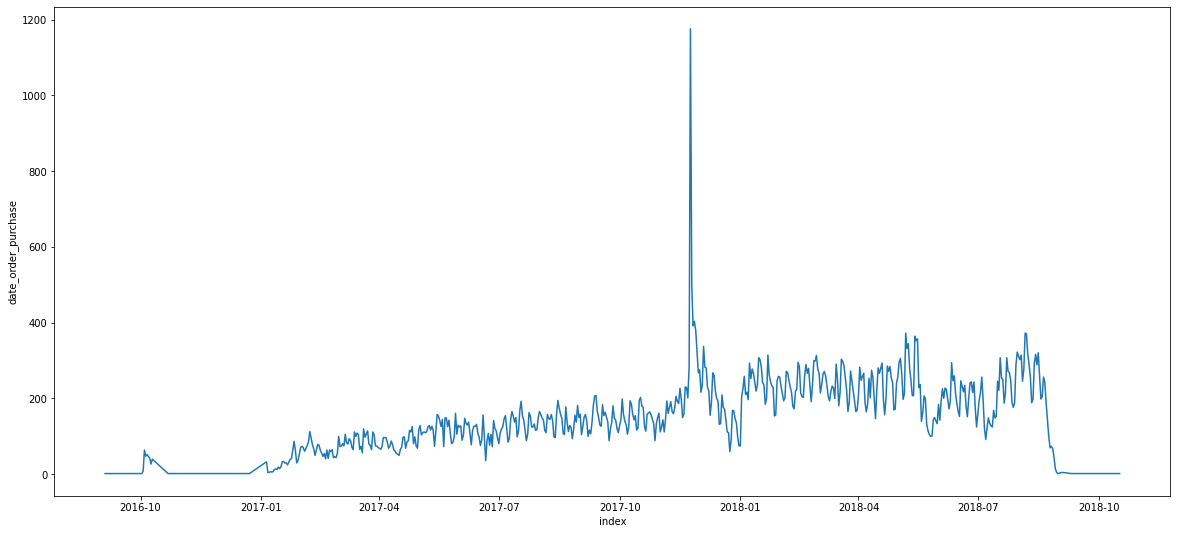

In [279]:
def get_date_format(info):
  return datetime.strptime(info.order_purchase_timestamp, '%Y-%m-%d %H:%M:%S').date()

orders["date_order_purchase"] = orders.apply(lambda x: get_date_format(x), axis=1)
purchase_time = orders["date_order_purchase"].value_counts().reset_index()
plt.figure(figsize=(20,9))
plt.plot(title="График по числу покупок и временем покупки", xlabel="Число покупок", ylabel = "Дата покупки")
sns.lineplot(data=purchase_time, x='index',y='date_order_purchase')
plt.show()

## Задание 12* (1 балл)

Используя полученные данные, а также сделав дополнительные вычисления (если необходимо), предположите:

1. Есть ли сезонность в покупках на маркетплейсе?

2. Есть ли какие-то необъяснимые падение/рост продаж? С чем это может быть связано?

## Задание 13 (0.3 балла)

Посчитайте CSAT (customer satisfaction - средняя оценка ревью) и отобразите средний CSAT по дням



In [280]:
order_reviews.review_score.mean() # средняя оценка ревью

4.08642062404257

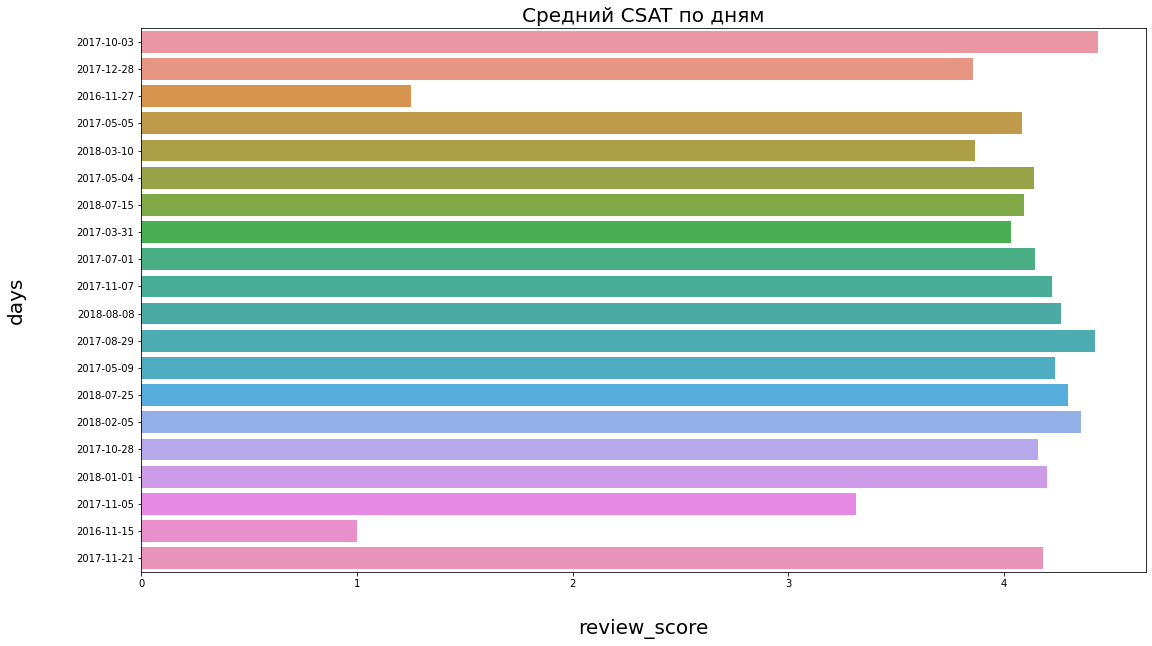

In [281]:
plt.figure(figsize=(18, 10))
order_reviews['formatted_day'] = order_reviews.review_creation_date.apply(lambda date: datetime.strptime(date, '%Y-%m-%d %H:%M:%S').date()) 
plot = sns.barplot(data=order_reviews.groupby("formatted_day") \
    .agg({"review_score": "mean"}) \
    .reset_index().sample(20) \
    .rename(columns = {"formatted_day": "days"}) \
    , x="review_score", y="days")
plot.set_title("Cредний CSAT по дням", fontsize=20)
plot.set_xlabel("review_score",fontsize=20, labelpad=30)
plot.set_ylabel("days",fontsize=20, labelpad=50)
plt.show()


## Задание 14 (0.3 балла)

Найдите топ-5 лучших и топ-5 худших продавцов по средней оценке и посчитайте их число продаж

In [282]:
order_items_seller_id_and_order_id = order_items[['order_id', 'seller_id']]
order_items_seller_id_and_order_id = order_items_seller_id_and_order_id.drop_duplicates(subset = ['order_id'])
order_reviews_review_score_id_and_order_id = order_reviews[['order_id', 'review_score']]
merged_order_items_and_order_reviews = pd.merge(order_items_seller_id_and_order_id,  order_reviews_review_score_id_and_order_id, how="inner", on = "order_id")
best_5_sellers = merged_order_items_and_order_reviews.groupby(["seller_id"]).agg({"review_score": "mean"}).sort_values('review_score', ascending=False).index.tolist()[0:5]
best_5_sellers  # топ 5 лучших

['ce4755084bc097113867e6454f8f5e52',
 '53088c75f948b48a7ece173ac17f0c12',
 '53b0300ca793f9834cd69c0678d35ee8',
 '544863df86ed3b78a04e0820d41430ee',
 'ee27a8f15b1dded4d213a468ba4eb391']

In [283]:
worst_5_sellers = merged_order_items_and_order_reviews.groupby(["seller_id"]).agg({"review_score": "mean"}).sort_values('review_score', ascending=False).index.tolist()[-5:] 
worst_5_sellers # топ 5 худших

['2ec6e37d992a95eaddb3369dcbcc76d9',
 'b6c6854d4d92a5f6f46be8869da3fa1a',
 '5ca5d579b5857ee8709479b1047cecc3',
 'd65f31d2413268e671989503f6cf9993',
 '83d7070a0b9a8b4625fa8682b819fabb']

In [284]:
number_of_sales_of_best_5 = []
for seller_id in best_5_sellers:
  number_of_sales_of_best_5.append([seller_id, len(order_items[order_items.seller_id == seller_id])])
number_of_sales_of_best_5 = pd.DataFrame(number_of_sales_of_best_5, columns = ["seller_id", "number_of_sales"])
number_of_sales_of_best_5 # число продаж для топ-5 лучших

,seller_id,number_of_sales
0,ce4755084bc097113867e6454f8f5e52,1
1,53088c75f948b48a7ece173ac17f0c12,3
2,53b0300ca793f9834cd69c0678d35ee8,10
3,544863df86ed3b78a04e0820d41430ee,1
4,ee27a8f15b1dded4d213a468ba4eb391,1


In [285]:
number_of_sales_of_worst_5 = []
for seller_id in worst_5_sellers:
  number_of_sales_of_worst_5.append([seller_id, len(order_items[order_items.seller_id == seller_id])])
number_of_sales_of_worst_5 = pd.DataFrame(number_of_sales_of_worst_5, columns = ["seller_id", "number_of_sales"])
number_of_sales_of_worst_5 # число продаж для топ-5 худших

,seller_id,number_of_sales
0,2ec6e37d992a95eaddb3369dcbcc76d9,2
1,b6c6854d4d92a5f6f46be8869da3fa1a,1
2,5ca5d579b5857ee8709479b1047cecc3,2
3,d65f31d2413268e671989503f6cf9993,3
4,83d7070a0b9a8b4625fa8682b819fabb,2


## Задание 15 (0.3 балла)

Посмотрите, как быстро отвечают пользователи (сделайте аггреграцию по дням) и влияет ли это на оценку?

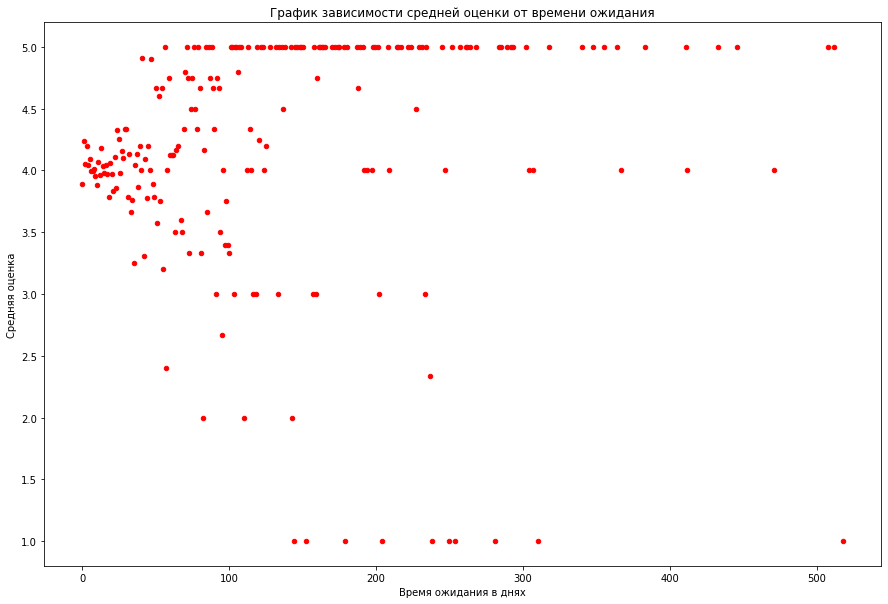

In [286]:

def get_diff_between_tow_dates(info):
  return (datetime.strptime(info.review_answer_timestamp, '%Y-%m-%d %H:%M:%S').date() - datetime.strptime(info.review_creation_date, '%Y-%m-%d %H:%M:%S').date()).days

order_reviews["difference_in_days"]  = order_reviews.apply(lambda x: get_diff_between_tow_dates(x), axis=1)
average_review_score_with_diiff_in_days = order_reviews.groupby(['difference_in_days']).agg({"review_score": "mean"})
average_review_score_with_diiff_in_days = average_review_score_with_diiff_in_days.reset_index()

df = pd.DataFrame(data = average_review_score_with_diiff_in_days);
df.plot.scatter(x = 'difference_in_days', y = 'review_score', c = 'red', figsize=(15, 10), xlabel="Время ожидания в днях", ylabel="Средняя оценка", title="График зависимости средней оценки от времени ожидания");

**Чем меньше время ожидания, тем больше отзывов (соответсвенно оценок) мы получаем. И в основном это оценки 3-5**

## Задание 16 (0.5 балла)

Отобразите распределение оценок для заказов, которые были доставлены вовремя и которые пришли с опозданием. Насколько влияет факт опоздания на оценку?

In [287]:
merged_orders_and_order_reviews = pd.merge(orders,  order_reviews, how="inner", on = "order_id")

[]

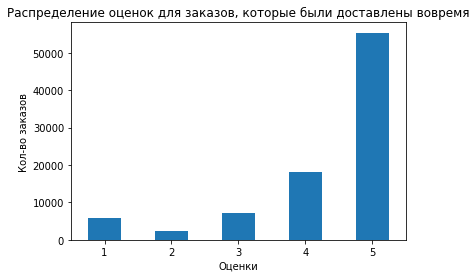

In [288]:
overdue_delivery = merged_orders_and_order_reviews[merged_orders_and_order_reviews["order_delivered_customer_date"] > merged_orders_and_order_reviews["order_estimated_delivery_date"]]
delivered_on_time = merged_orders_and_order_reviews[merged_orders_and_order_reviews["order_delivered_customer_date"] <= merged_orders_and_order_reviews["order_estimated_delivery_date"]]
data = delivered_on_time['review_score'].value_counts().reset_index()
data = data.sort_values('index')
df = pd.DataFrame(data=data)
ax = df.plot.bar(x='index', y='review_score', rot=0, xlabel="Оценки", ylabel="Кол-во заказов", legend=None, title="Распределение оценок для заказов, которые были доставлены вовремя")
ax.plot()

[]

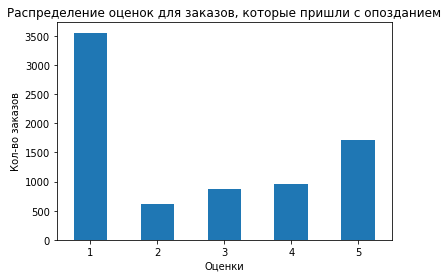

In [289]:
overdue_delivery = merged_orders_and_order_reviews[merged_orders_and_order_reviews["order_delivered_customer_date"] > merged_orders_and_order_reviews["order_estimated_delivery_date"]]
data = overdue_delivery['review_score'].value_counts().reset_index()
data = data.sort_values('index')
df = pd.DataFrame(data=data)
ax = df.plot.bar(x='index', y='review_score', rot=0, xlabel="Оценки", ylabel="Кол-во заказов", legend=None, title="Распределение оценок для заказов, которые пришли с опозданием")
ax.plot()

**Замечаем, что большинство доставленных вовремя заказов оценены 5, в то время как большинство заказов с просроченной доставкой оценены в 1**




## Задание 17* (1,5 балла)

Есть ли среди пользователей хейтеры? Определите их и вычислите средний CSAT без их участия

## Задание 18 (0.4 балла)

Изобразите зависимость между ценой заказа и числом дней между покупкой и доставкой с разбивкой по признаку "есть заказ из другого штата". Есть ли зависимость?

## Задание 19 (0.6 баллов)

Отобразите на карте все точки продавцов (если они находятся в одном месте, то необходимо отметить кол-во)

Где больше всего продавцов находится?

In [290]:
geolocation_without_post_code_duplicates = geolocation.drop_duplicates(subset = ["geolocation_zip_code_prefix"])
sellers_merged_with_geolocation = pd.merge(sellers, geolocation_without_post_code_duplicates, how="inner", left_on="seller_zip_code_prefix", right_on="geolocation_zip_code_prefix")
sellers_merged_with_geolocation['quantity_of_identics'] = sellers_merged_with_geolocation.geolocation_zip_code_prefix.apply(lambda zip_code: len(sellers_merged_with_geolocation[sellers_merged_with_geolocation.geolocation_zip_code_prefix == zip_code])) 

fig = go.Figure(go.Scattermapbox(lat=sellers_merged_with_geolocation['geolocation_lat'], lon=sellers_merged_with_geolocation['geolocation_lng'], hoverinfo="text", hovertext=sellers_merged_with_geolocation.quantity_of_identics))
capital = sellers_merged_with_geolocation[sellers_merged_with_geolocation['geolocation_city']=='sao paulo']
map_center = go.layout.mapbox.Center(lat=capital['geolocation_lat'].values[0], lon=capital['geolocation_lng'].values[0])
fig.update_layout(mapbox_style="open-street-map", mapbox=dict(center=map_center, zoom=5))
fig.show()

## Задание 20 (1,5 балл)

Определите топ-5 продавцов, которые чаще всего отсылают свою посылку в другие регионы и визуализируйте их отсылки

In [291]:
orders_customers_id = orders[["customer_id", "order_id"]]
orders_sellers_id = order_items[["order_id", "seller_id"]]
merged_orders_seller_id_with_sellers = orders_sellers_id.merge(sellers, on="seller_id", how="inner")
merged_orders_customers_id_with_customers = orders_customers_id.merge(customers, on="customer_id", how="inner")

final_merged_data = merged_orders_customers_id_with_customers.merge(merged_orders_seller_id_with_sellers, how="inner", on="order_id")
final_merged_data = final_merged_data[["customer_id", "order_id", "customer_state", "seller_id", "seller_state"]]
final_merged_data = final_merged_data.drop_duplicates(subset="order_id")
top_5_sellers_sent_to_other_regions  = []
for seller in final_merged_data["seller_id"].unique():
  seller_sent = final_merged_data[final_merged_data.seller_id == seller]
  region_of_seller = seller_sent['seller_state'].iloc[0]
  count_of_sent_to_other_regions = len(seller_sent[seller_sent.customer_state != region_of_seller])
  top_5_sellers_sent_to_other_regions.append([seller, count_of_sent_to_other_regions])

top_5_sellers_sent_to_other_regions = pd.DataFrame(data=top_5_sellers_sent_to_other_regions, columns=["seller_id", "counts_of_sent_to_other_regions"])
top_5_sellers_sent_to_other_regions = top_5_sellers_sent_to_other_regions.sort_values('counts_of_sent_to_other_regions', ascending=False).head(5)
top_5_sellers_sent_to_other_regions

,seller_id,counts_of_sent_to_other_regions
69,6560211a19b47992c3666cc44a7e94c0,1040
21,cc419e0650a3c5ba77189a1882b7556a,1032
73,4a3ca9315b744ce9f8e9374361493884,992
112,1f50f920176fa81dab994f9023523100,904
203,7a67c85e85bb2ce8582c35f2203ad736,787


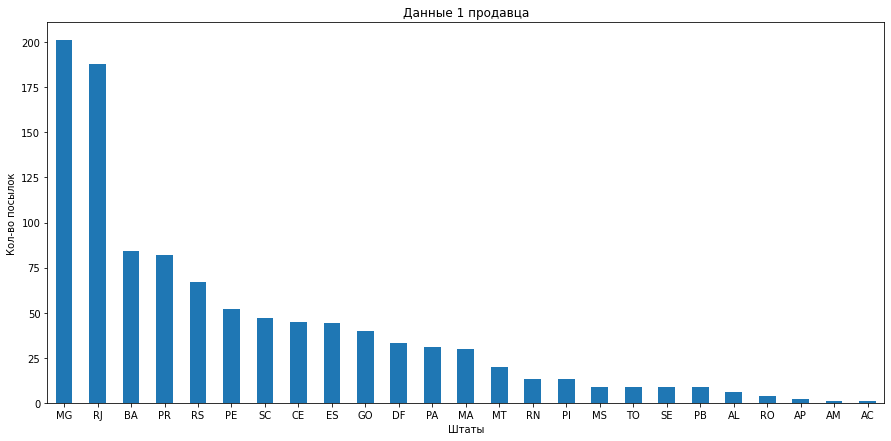

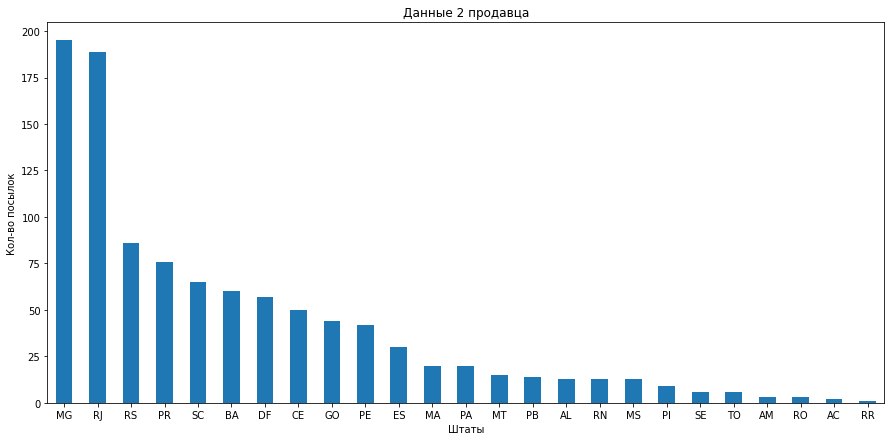

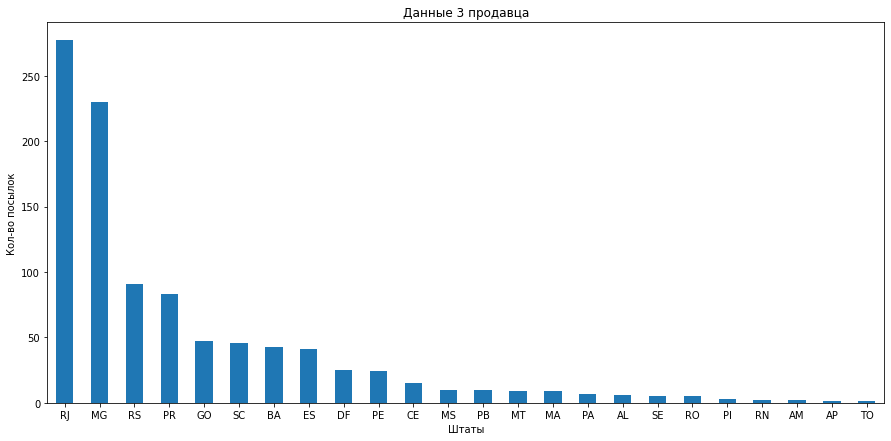

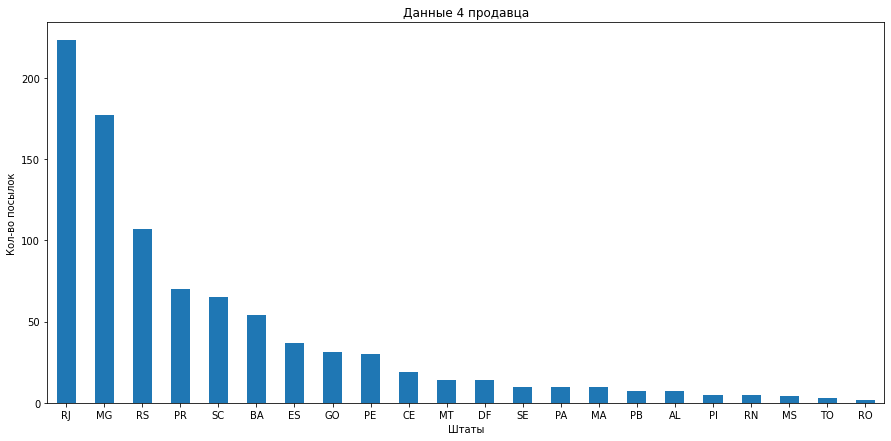

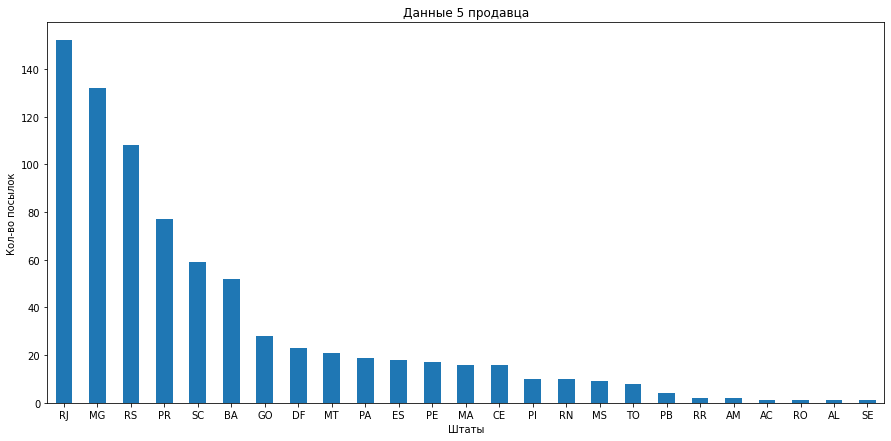

In [292]:
i = 0
for data in top_5_sellers_sent_to_other_regions.itertuples():
  seller_sent = final_merged_data[final_merged_data.seller_id == data.seller_id]
  region_of_seller = seller_sent['seller_state'].iloc[0]
  data_of_sent_to_other_regions = seller_sent[seller_sent.customer_state != region_of_seller]
  data_of_sent_to_other_regions = data_of_sent_to_other_regions['customer_state'].value_counts().reset_index()
  df = pd.DataFrame(data=data_of_sent_to_other_regions)
  ax = df.plot.bar(x='index', y='customer_state', rot=0, xlabel="Штаты", ylabel="Кол-во посылок", legend=None, figsize=(15, 7), title=f"Данные {i + 1} продавца")
  i += 1
  ax.plot()

## Задание 21* (2 балла)

Сделайте анимацию по датам с доставкой между продавцами и пользователями

## Задание 22* (творческое, отдельно поставим баллы)

Проведите дополнительно исследование между параметрами, которые вам интересны и могут быть полезными (обоснуйте, зачем это смотреть). Сделайте выводы

## Попугай для ДЗ

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Rose-ringed_parakeet_%28Psittacula_krameri_manillensis%29.jpg/1024px-Rose-ringed_parakeet_%28Psittacula_krameri_manillensis%29.jpg)

А это ожереловый попугай (или индийский кольчатый попугай). Этот вид явно выделяет наличие такого колечка на шее. Самый распространенный попугай в мире

Они очень хорошо и быстро летают, но ходят максимально неуклюже)

В отличии от многих попугаев, для которых человеческая деятельность является вредом и уменьшает их естественный ареал обитания, то как раз для этих птиц человеческая деятельность - это плюс, потому что они находят корм внутри человеческих обществ (не боятся людей, лучше всего приспосабливаются, едят пшеницу). Поговаривают, что в качестве домашних попугаев их держали еще в древней Греции и Риме, а в  средневековой Индии ожереловые попугаи часто были питомцами знатных особ и монархов, причём владение этим попугаем считалось элементом роскоши и престижа